### Exercise 5.1: Understanding and staging the data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Importing the data

In [2]:
ins0 = pd.read_csv('Aiza Insurance Data.csv')
ins0.head()

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Response
0,Male,28,1,< 1 Year,No,28885.0,0
1,Female,24,1,< 1 Year,No,25093.0,0
2,Male,47,0,1-2 Year,Yes,2630.0,0
3,Male,29,0,< 1 Year,Yes,46835.0,0
4,Male,68,1,1-2 Year,No,26908.0,0


In [3]:
ins0.Response.value_counts()

0    31189
1     6069
Name: Response, dtype: int64

In [4]:
ins0.Response.value_counts(normalize=True)

0    0.837109
1    0.162891
Name: Response, dtype: float64

In [5]:
ins1 = pd.get_dummies(data=ins0, 
                      columns=['Gender','Vehicle_Age','Vehicle_Damage'], 
                      drop_first=True)
ins1.head()

,Age,Previously_Insured,Annual_Premium,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,28,1,28885.0,0,1,1,0,0
1,24,1,25093.0,0,0,1,0,0
2,47,0,2630.0,0,1,0,0,1
3,29,0,46835.0,0,1,1,0,1
4,68,1,26908.0,0,1,0,0,0


### Exercise 5.2: Accuracy for imbalanced classes

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_test = train_test_split(ins1, test_size=0.3, random_state=42, 
                                     stratify=ins1.Response)

In [8]:
df_train.shape, df_test.shape

((26080, 8), (11178, 8))

In [9]:
df_train.Response.value_counts(normalize=True)

0    0.837117
1    0.162883
Name: Response, dtype: float64

In [10]:
df_test.Response.value_counts(normalize=True)

0    0.837091
1    0.162909
Name: Response, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
cols_to_scale = ['Age','Annual_Premium']

In [13]:
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [14]:
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [15]:
df_train[cols_to_scale].mean()

Age               6.796710e-17
Annual_Premium    3.897700e-16
dtype: float64

In [16]:
df_test[cols_to_scale].mean()

Age               0.021344
Annual_Premium    0.005766
dtype: float64

In [17]:
X_train = df_train.drop('Response', axis=1)
y_train = df_train['Response']
X_test = df_test.drop('Response', axis=1)
y_test = df_test['Response']

In [18]:
X_train.shape, X_test.shape

((26080, 7), (11178, 7))

In [19]:
y_train.shape, y_test.shape

((26080,), (11178,))

Building the Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression(random_state=42)

In [22]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Evaluating the model

In [23]:
y_train_pred = logreg.predict(X_train)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
accuracy_score(y_train, y_train_pred).round(3)

0.837

In [26]:
y_train.value_counts()

0    21832
1     4248
Name: Response, dtype: int64

In [27]:
confusion_matrix(y_train, y_train_pred)

array([[21339,   493],
       [ 3768,   480]], dtype=int64)

In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     21832
           1       0.49      0.11      0.18      4248

    accuracy                           0.84     26080
   macro avg       0.67      0.55      0.55     26080
weighted avg       0.79      0.84      0.79     26080



### Section: F1 score

In [29]:
from sklearn.metrics import plot_roc_curve

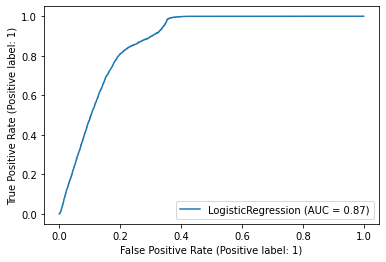

In [30]:
plot_roc_curve(logreg, X_train, y_train)
plt.show()

### Section: Precision-Recall Curve

In [31]:
from sklearn.metrics import plot_precision_recall_curve

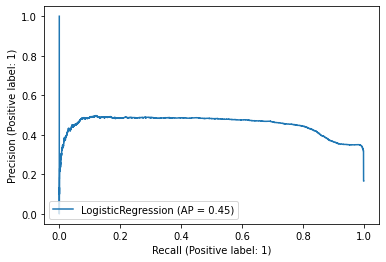

In [32]:
plot_precision_recall_curve(logreg, X_train, y_train)
plt.show()

### Exercise 5.3: Adjusting class_weight

In [33]:
logreg_wt = LogisticRegression(class_weight='balanced', random_state=42)

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [35]:
folds = StratifiedKFold(random_state=42, n_splits=3, shuffle=True)

In [36]:
cv_scores = cross_validate(logreg_wt,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [37]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.062169,0.01496,0.353906,0.959746,0.517123
1,0.046561,0.00000,0.348629,0.960452,0.511567
2,0.046864,0.00000,0.349011,0.959040,0.511777


### Exercise 5.4: Random undersampling of insurance data

In [41]:
!pip install imblearn

In [43]:
from imblearn.under_sampling import RandomUnderSampler

In [44]:
u_sampler = RandomUnderSampler(random_state=42)

In [45]:
X_train_under, y_train_under = u_sampler.fit_resample(X_train, y_train)

In [46]:
y_train_under.value_counts()

0    4248
1    4248
Name: Response, dtype: int64

In [47]:
logreg = LogisticRegression(random_state=42)

In [48]:
cv_scores = cross_validate(logreg,
                            X_train_under,
                            y_train_under,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [49]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.034441,0.005984,0.741740,0.951271,0.833540
1,0.018877,0.005584,0.730937,0.947740,0.825338
2,0.014987,0.000000,0.733224,0.949153,0.827331


### Section: Using Pipelines for evaluating re-balanced data

In [50]:
from imblearn.pipeline import Pipeline

In [51]:
u_sampler = RandomUnderSampler(random_state=42)
logreg = LogisticRegression(random_state=42)

In [52]:
p_steps = [('under', u_sampler), 
           ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [53]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [54]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.048864,0.015951,0.353577,0.970339,0.518295
1,0.029841,0.015621,0.349638,0.954096,0.511742
2,0.031243,0.000000,0.348819,0.959746,0.511672


### Exercise 5.5: Tomek Links applied to insurance data

In [55]:
from imblearn.under_sampling import TomekLinks

In [56]:
u_sampler =  TomekLinks()
X_train_under, y_train_under = u_sampler.fit_resample(X_train, y_train)

In [57]:
y_train.value_counts()

0    21832
1     4248
Name: Response, dtype: int64

In [58]:
y_train_under.value_counts()

0    20523
1     4248
Name: Response, dtype: int64

In [59]:
logreg = LogisticRegression(random_state=42)

In [60]:
logreg.fit(X_train_under, y_train_under)

LogisticRegression(random_state=42)

In [61]:
u_sampler =  TomekLinks(n_jobs=-1)
logreg = LogisticRegression(random_state=42)

In [62]:
p_steps = [('under', u_sampler), 
           ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [63]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [64]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,2.100754,0.010452,0.464316,0.381356,0.418767
1,0.190290,0.010841,0.487424,0.396893,0.437524
2,0.156457,0.015621,0.501832,0.387006,0.437002


### Exercise 5.6: edited nearest neighbour under sampling

In [66]:
from imblearn.under_sampling import EditedNearestNeighbours

In [67]:
u_sampler = EditedNearestNeighbours(n_jobs=-1)

In [68]:
X_train_under, y_train_under = u_sampler.fit_resample(X_train, y_train)

In [69]:
y_train.value_counts()

0    21832
1     4248
Name: Response, dtype: int64

In [70]:
y_train_under.value_counts()

0    16967
1     4248
Name: Response, dtype: int64

In [71]:
p_steps = [('under', u_sampler), 
           ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [72]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [73]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.192418,0.008975,0.431321,0.807203,0.562223
1,0.164065,0.011175,0.438258,0.817090,0.570513
2,0.171690,0.011048,0.431843,0.825565,0.567063


### Section: Oversampling

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [80]:
o_sampler = RandomOverSampler(random_state=42, sampling_strategy=0.75)

In [81]:
y_train.value_counts()

0    21832
1     4248
Name: Response, dtype: int64

In [82]:
X_train_over, y_train_over = o_sampler.fit_resample(X_train, y_train)

In [83]:
y_train_over.value_counts()

0    21832
1    16374
Name: Response, dtype: int64

In [84]:
logreg = LogisticRegression(random_state=42)

In [85]:
p_steps = [('over', o_sampler), 
            ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [86]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [87]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.082575,0.010624,0.375790,0.881356,0.526916
1,0.046801,0.015622,0.366282,0.897599,0.520262
2,0.062485,0.000000,0.383494,0.872881,0.532873


### Exercise 5.7: Synthetic Data Generation with SMOTE

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
o_sampler = SMOTE(random_state=42, sampling_strategy=0.75)

In [91]:
logreg = LogisticRegression(random_state=42)

In [92]:
p_steps = [('over', o_sampler), 
           ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [93]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [94]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.097730,0.015640,0.376136,0.877119,0.526494
1,0.083224,0.000000,0.380574,0.879944,0.531343
2,0.078814,0.006137,0.375113,0.881356,0.526249


### Exercise 5.8: Synthetic Data Generation with ADASYN

In [95]:
from imblearn.over_sampling import ADASYN

In [96]:
o_sampler = ADASYN(random_state=42, sampling_strategy=0.75)

In [97]:
logreg = LogisticRegression(random_state=42)

In [98]:
p_steps = [('over', o_sampler), 
           ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [99]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [100]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.158412,0.009864,0.358352,0.927260,0.516929
1,0.122468,0.015621,0.350956,0.932910,0.510039
2,0.140593,0.000000,0.355033,0.916667,0.511830


### Exercise 5.9: Using a combination of over and undersampling

In [101]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [102]:
logreg = LogisticRegression(random_state=42)

In [103]:
combo_sampler = SMOTETomek(random_state=42, sampling_strategy=0.75)

In [104]:
p_steps = [('combo', combo_sampler), 
           ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [105]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

In [106]:
pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.402874,0.000000,0.376014,0.883475,0.527514
1,0.352313,0.000000,0.378133,0.884181,0.529723
2,0.371377,0.010727,0.373659,0.885593,0.525566


##### Trying SMOTEENN

In [107]:
combo_sampler = SMOTEENN(random_state=42, sampling_strategy=0.75)

In [108]:
logreg = LogisticRegression(random_state=42)

In [109]:
p_steps = [('combo', combo_sampler), 
           ('model', logreg)]
pipeline = Pipeline(steps = p_steps)

In [110]:
cv_scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            cv=folds,
                            scoring=['precision','recall','f1'])

pd.DataFrame(cv_scores)

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.374445,0.000000,0.375298,0.888418,0.527685
1,0.389217,0.010080,0.376161,0.887006,0.528286
2,0.399027,0.009692,0.373731,0.884181,0.525388


### Section: Comparing the approaches

In [111]:
sampler_list = [EditedNearestNeighbours(n_jobs=-1),
                RandomOverSampler(random_state=42, sampling_strategy=0.75),
                ADASYN(random_state=42, sampling_strategy=0.75),
                SMOTEENN(random_state=42, sampling_strategy=0.75)]

In [112]:
logreg = LogisticRegression(random_state=42)

In [113]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [114]:
for sampler in sampler_list:
    p_steps = [('sampler', sampler), 
               ('model', logreg)]
    pipeline = Pipeline(steps = p_steps)
    pipeline.fit(X_train, y_train)
    print(sampler)    
    y_pred = pipeline.predict(X_test)
    print('Precision:', precision_score(y_test, y_pred).round(2), 
          'Recall:', recall_score(y_test, y_pred).round(2),
          'F1 Score:', f1_score(y_test, y_pred).round(2),
           '\n')

EditedNearestNeighbours(n_jobs=-1)
Precision: 0.43 Recall: 0.83 F1 Score: 0.57 

RandomOverSampler(random_state=42, sampling_strategy=0.75)
Precision: 0.38 Recall: 0.9 F1 Score: 0.53 

ADASYN(random_state=42, sampling_strategy=0.75)
Precision: 0.36 Recall: 0.93 F1 Score: 0.52 

SMOTEENN(random_state=42, sampling_strategy=0.75)
Precision: 0.39 Recall: 0.9 F1 Score: 0.54 

